# Music Overview

The *music* topic area is rich in opportunity for the creation of one piece production workflows. A computational representation of a piece of music can be created within the body of the document and then rendered as sheet music. The same musical object can be used to generate audio files that can be play the piece of music via an embedded audio player. Corpuses exist where a wide variety of musical scores have be represented using standard document formats such as *MusicXML*. This ready availability of scores makes is relatively easy to create materials around well known pieces, particularly if they are in the public domain.

If required, created audio files can be converted to waveforms that can be analysed using a variety of signal processing techniques.

In terms of *creating* learning materials, the one-piece flow approach provides a straighforward way of discovering or creating pieces of music, viewing the sheet music display, creating various visualisations over the music (for example, looking at pitch over the duration the piece), and rendering an audio version of the music that we can embed in the output document and play back and listen to directly.

Sheet music and the (embedded) audio files can be generated directly from the representation of a piece of music. As well as creating midi files, we can also create audio files (eg `.wav`.files). Using soundfounts, it is possible to create audio files using different instruments, where appropriate.

In terms of creating *learning activities*, learners can listen to provided pieces of music, as well as edit them and listen to the changes. Learners can also create their own pieces of music, from which they can directly generate audio and visual representations. This opens up the possibility for a wide range of hands on music analysis tasks in a notebook setting, where learners can annotate the materials as well as creating and responding to their own musical creations in a self-narrated way.

## `music21`

The [`music21`](https://web.mit.edu/music21/) package provides a wide ranging toolkit for computer-aided musicology. 

In [1]:
%%capture
try:
    import music21
except:
    %pip install --upgrade music21

     |████████████████████████████████| 19.2 MB 8.6 MB/s eta 0:00:01
     |████████████████████████████████| 48 kB 6.4 MB/s eta 0:00:011
  Created wheel for music21: filename=music21-6.7.1-py3-none-any.whl size=21941692 sha256=b63218e83b09dbdc74839ee3729dce50239099234bc9d5a6d9c14914d6bb5058
  Stored in directory: /Users/tonyhirst/Library/Caches/pip/wheels/71/cb/93/dc4747504212dcec3fed965cfab9589750f8b337ca7c451ff1
Successfully built music21
You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


Import packages from `music21`:

In [1]:
import music21
from music21 import *

### Create a simple score using *TinyNotation*

[*TinyNotation*](http://web.mit.edu/music21/doc/usersGuide/usersGuide_16_tinyNotation.html) is a simple notation for representing music.

Whilst *TinyNotation* may be be appropriate for representing complex pieces of music, the straightforward syntax provides a veery quick and easy way creating a simple piece of music.

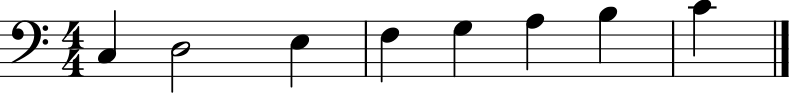

In [29]:
from music21 import converter

s = converter.parse('tinyNotation: 4/4 C4 D2 E4 F4 G4 A4 B4 c4')
s.show()

Other visualisations of the music are also possible. For example, we can look at the pitch and note length:

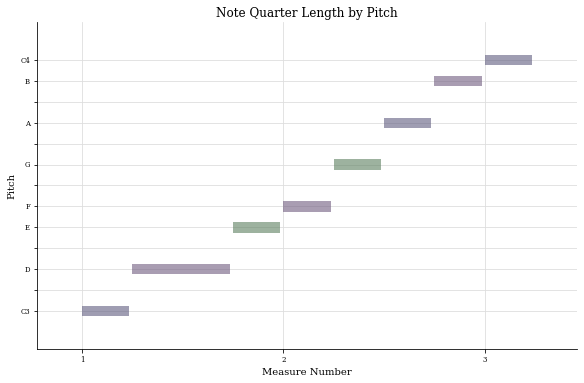

In [30]:
s.plot()

Or analyse the key:

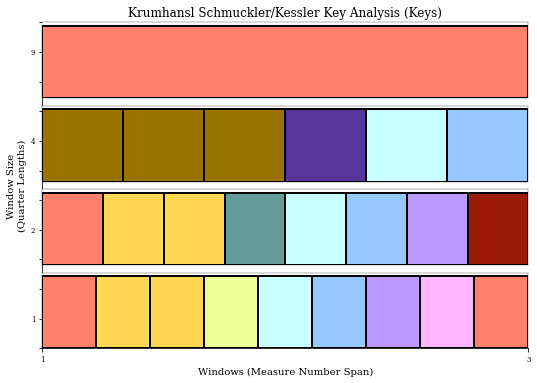

In [31]:
s.plot('key')

We can analyse the music in terms of pitch distribution:

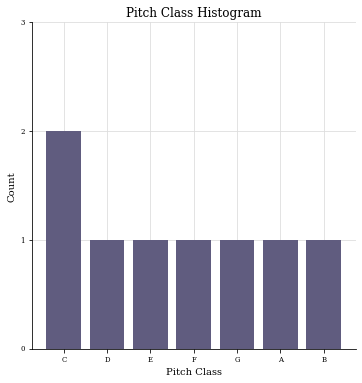

In [85]:
s.plot('histogram', 'pitchClass')

### MIDI File Generation and Playback

We can listen to the same piece of music creating a MIDI file from it and passing that file to an embedded audio player:

In [3]:
s.show('midi')

### Constructing Music From Primitives

If we need more control over the music, we can construct things like chords directly:

In [5]:
from music21 import chord

c = chord.Chord("C4 E4 G4")
c

<music21.chord.Chord C4 E4 G4>

We can render the object visually as piece of music:

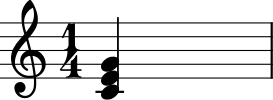

In [6]:
c.show()

Or listen to it:

In [7]:
c.show('midi')

We can test for particular musical properties of the object:

In [8]:
c.isConsonant()

True

## Access to Scores

The `music21` includes a wide corpus of scores that we can work with without having to download any additional files:

In [33]:
from music21 import corpus

corpus.getPaths()[:3]

[PosixPath('/usr/local/lib/python3.9/site-packages/music21/corpus/airdsAirs/book1.abc'),
 PosixPath('/usr/local/lib/python3.9/site-packages/music21/corpus/airdsAirs/book2.abc'),
 PosixPath('/usr/local/lib/python3.9/site-packages/music21/corpus/airdsAirs/book3.abc')]

Select a random piece:

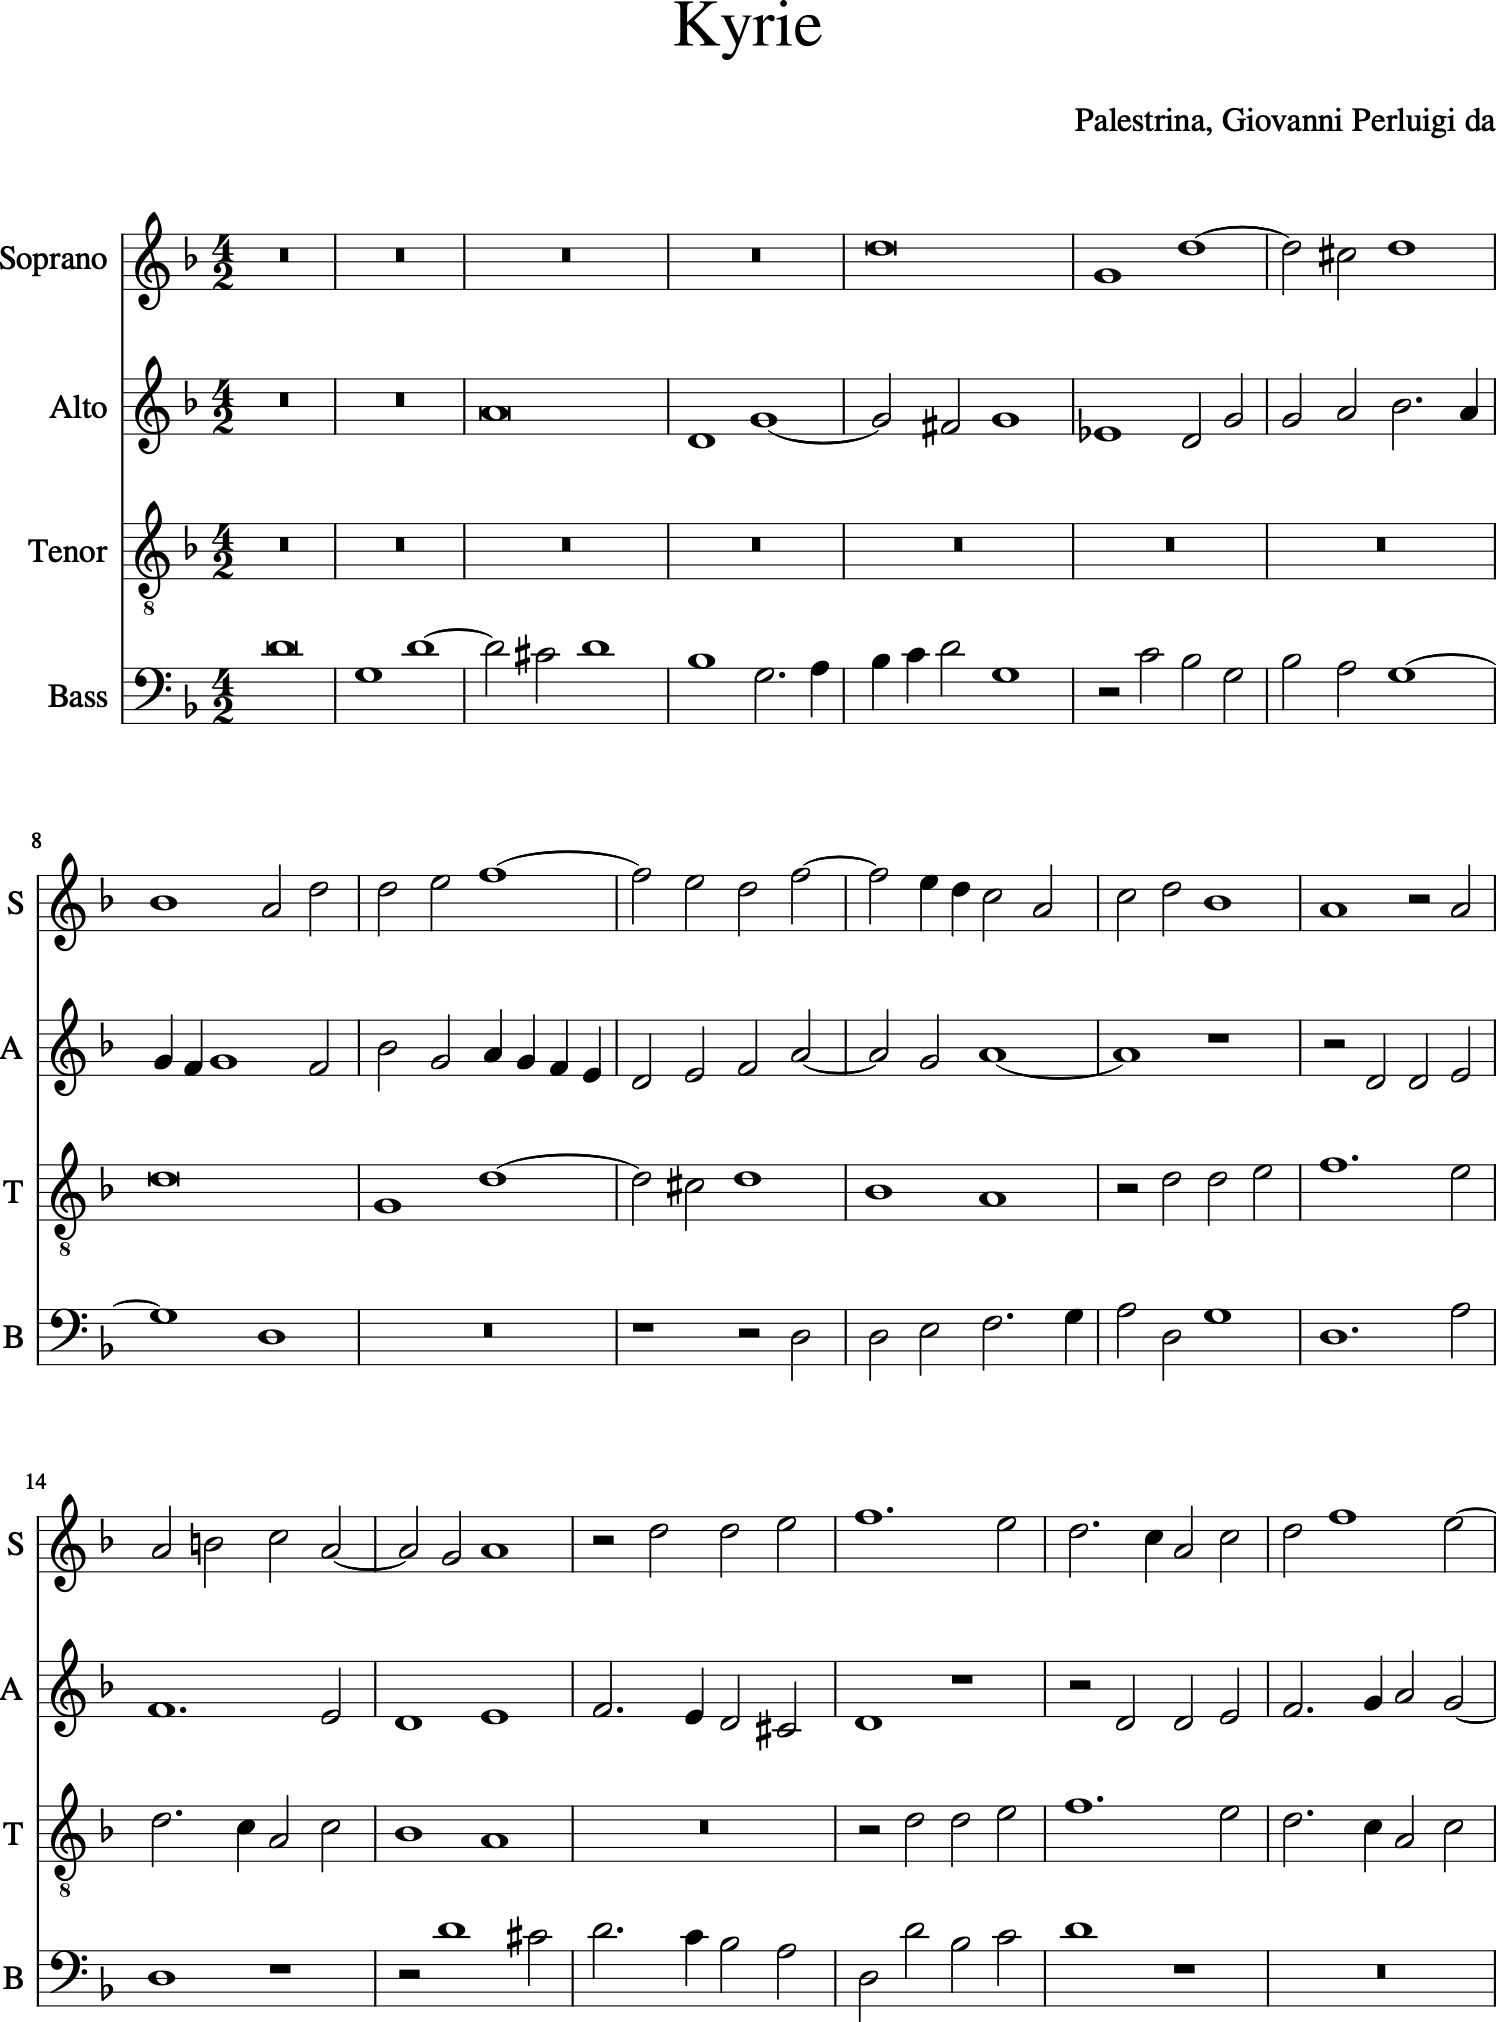

In [47]:
import random

selected_piece = random.choice(corpus.getPaths())

p = corpus.parse(selected_piece)

p.show()

Metadata is associated with each piece that we can extract directly:

In [46]:
p.metadata.title, p.metadata.composer

('Agnus', 'Palestrina, Giovanni Perluigi da')

We can load in a piece by specific reference:

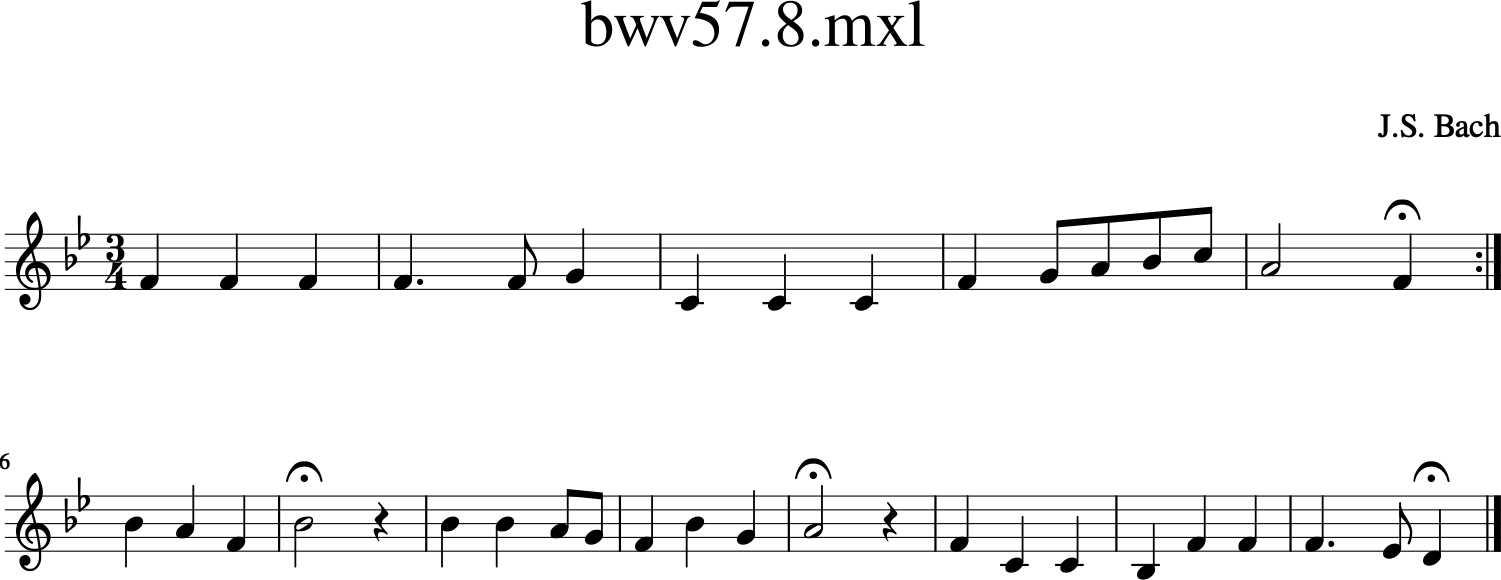

In [9]:
myBach = corpus.parse('bach/bwv57.8')
alto = myBach.parts['Alto']

alto.show()

As you might expect, we can also listen to the piece:

In [10]:
alto.show('midi')

### Searching Through Scores

We can search through these scores to find a piece of music that we can then use within the notebook.

For example, we can search by composer:

In [ ]:
a = [c for c in corpus.search('carolan', 'composer')]
a[0].metadata.all()

Searches return a metadata bundle, which cas also be search within by chaining the search queries:

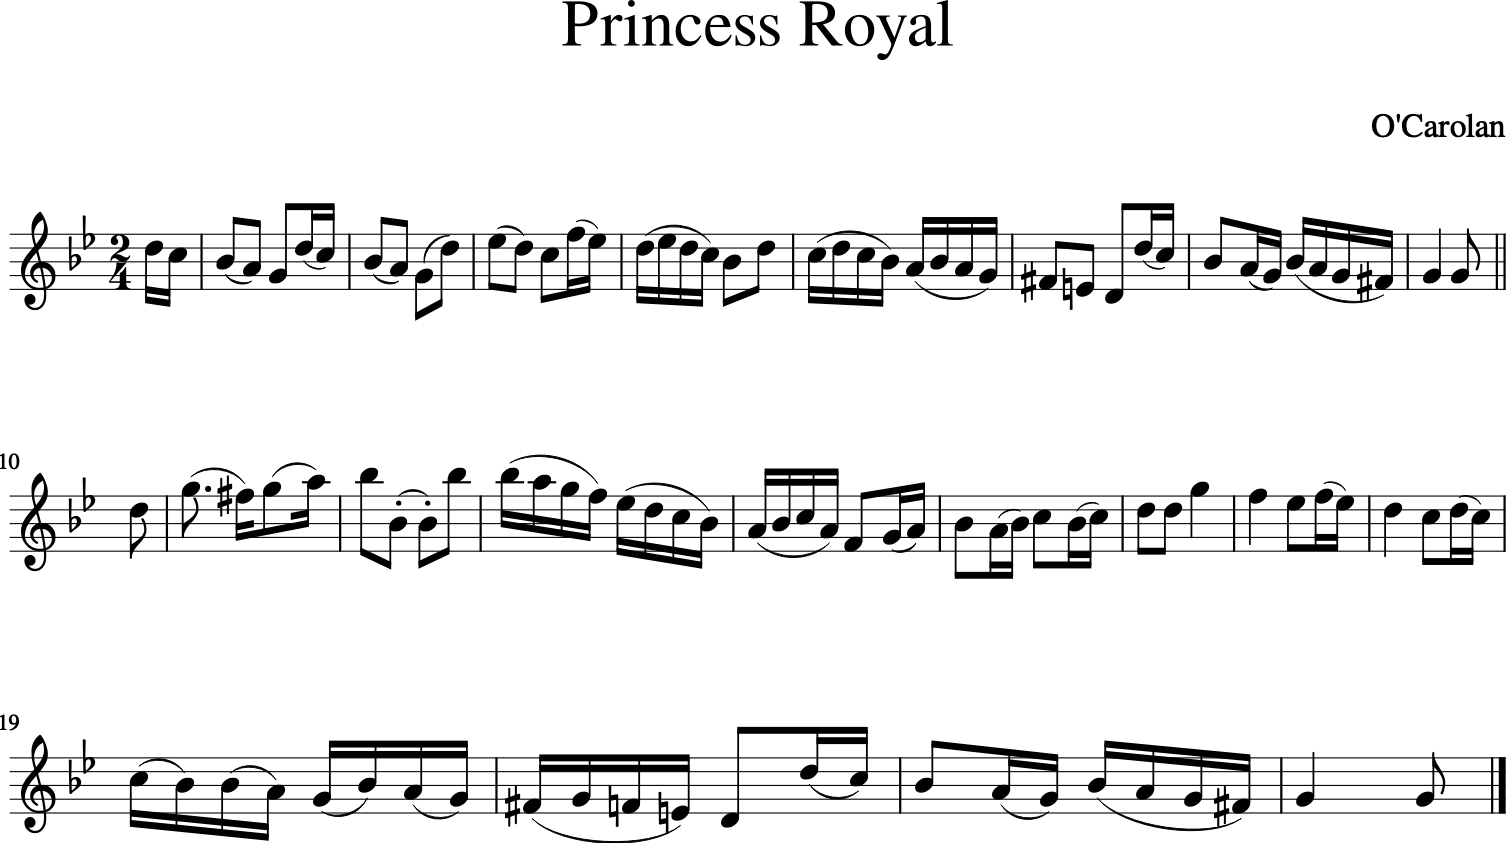

In [51]:
c = corpus.search('carolan', 'composer').search('Princess Royal', 'title')

c[0].parse().show()

In [52]:
c[0].show('midi')

### Searching Lyrics

Many of the pieces of music in the `music21` corpus include lyrics. If we have a piece of musing with lyrics, we can search within it for particular search terms.

For example, consider the following piece:

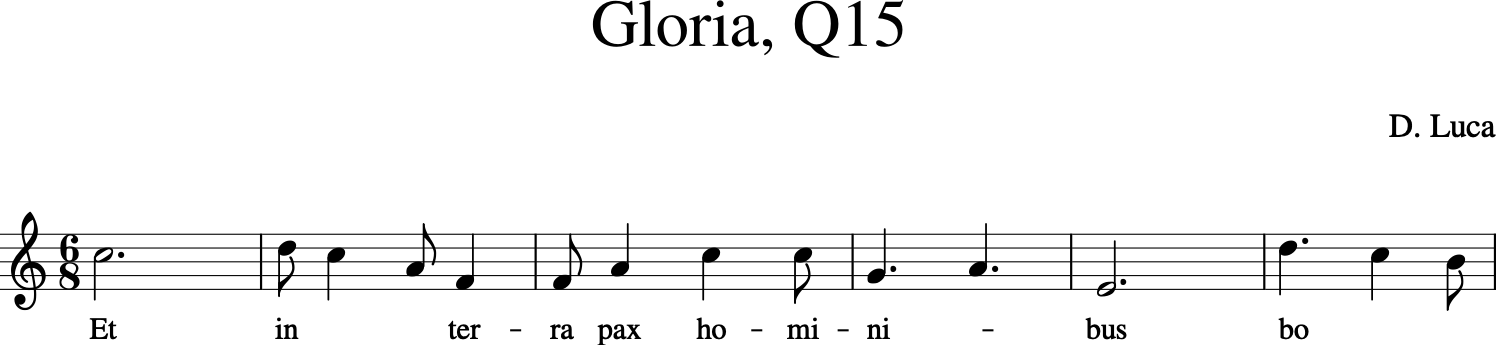

In [86]:
#http://web.mit.edu/music21/doc/usersGuide/usersGuide_28_lyricSearcher.html

luca = corpus.parse('luca/gloria')
cantus = luca.parts[0]
cantus.measures(1, 6).show()

We can extract all the lyrics and then search that as we would any text string:

In [89]:
music21.text.assembleLyrics(cantus)

'Et in terra pax hominibus bone voluntatis. Laudamus te. Benedicimus te. Adoramus te. Glorificamus te. Gratias agimus tibi propter magnam gloriam tuam. Domine Deus, Rex celestis, Deus Pater omnipotens. Domine Fili unigenite, Jesu Christe. Domine Deus, Agnus Dei, Filius Patris. Qui tollis peccata mundi, miserere nobis. Qui tollis peccata mundi, suscipe deprecationem nostram. Qui sedes ad dexteram Patris, miserere nobis. Quoniam tu solus Sanctus. Tu solus Dominus. Tu solus Altissimus, Jesu Christe. Cum Sancto Spiritu in gloria Dei Patris. Amen.'

Or we can search the music and retrieve the location by measure:

In [90]:
lyric_search = search.lyrics.LyricSearcher(cantus)

domineResults = lyric_search.search("Domine")

domineResults

[SearchMatch(mStart=28, mEnd=29, matchText='Domine', els=(<music21.note.Note C>, <music21.note.Note A>, <music21.note.Note F>), indices=[...], identifier=1),
 SearchMatch(mStart=38, mEnd=39, matchText='Domine', els=(<music21.note.Note C>, <music21.note.Note A>, <music21.note.Note B>), indices=[...], identifier=1),
 SearchMatch(mStart=48, mEnd=48, matchText='Domine', els=(<music21.note.Note A>, <music21.note.Note B>, <music21.note.Note C>), indices=[...], identifier=1)]

From the response, we see measure ranges associated with the occurrence of the reconstructed search term (as woul will see in the music, the search term is represented there split out over mutliple syllables):

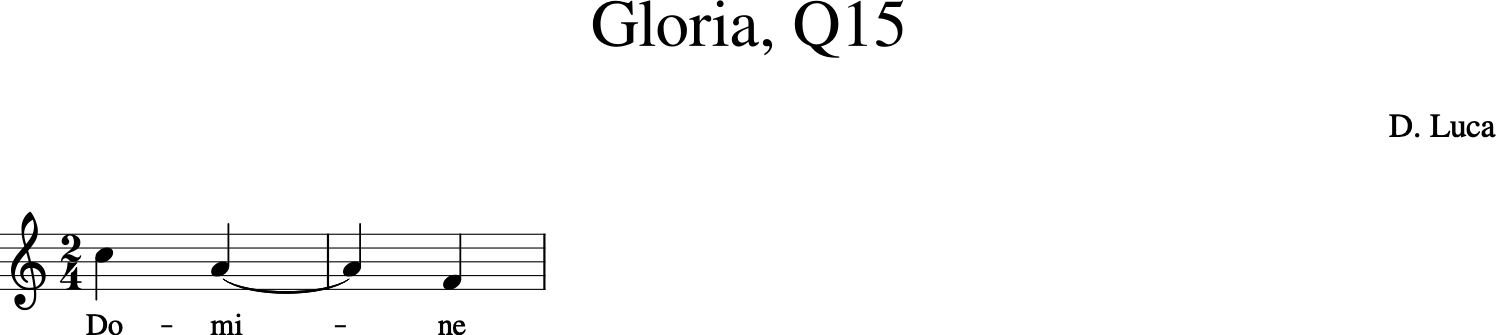

In [92]:
cantus.measures(domineResults[0].mStart, domineResults[0].mEnd).show()

Let's look over the full range of the results:

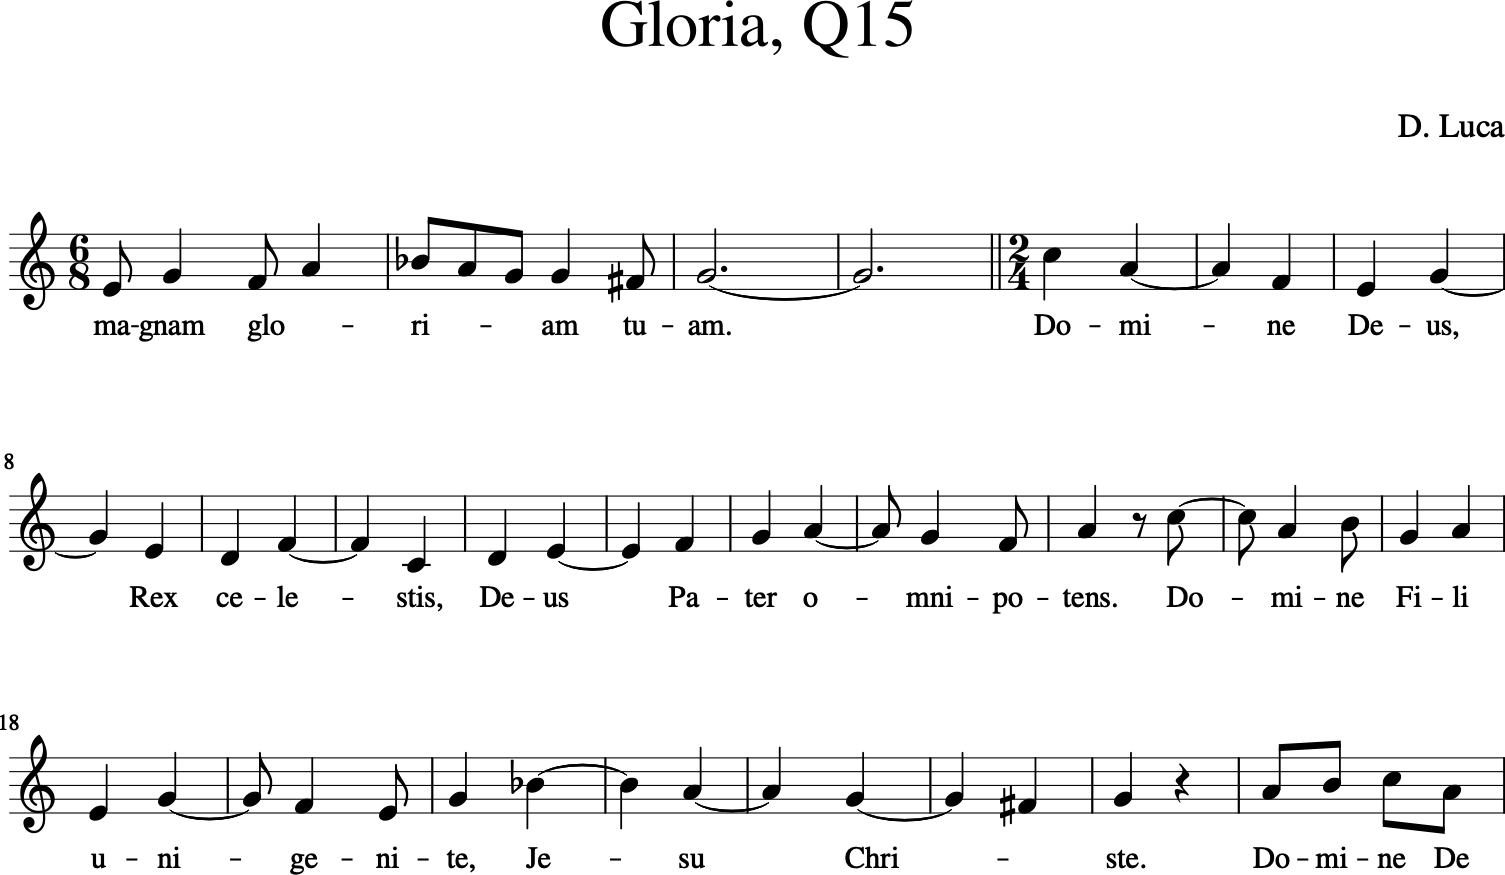

In [91]:
cantus.measures(24, 48).show()

## Viewing Part of a Piece of Music

When discussing a particular piece, we may want to focus on particular parts of it. We can reference into particular measures and just focus on those. For example, suppose we want to just inspect the opening measures of a piece:

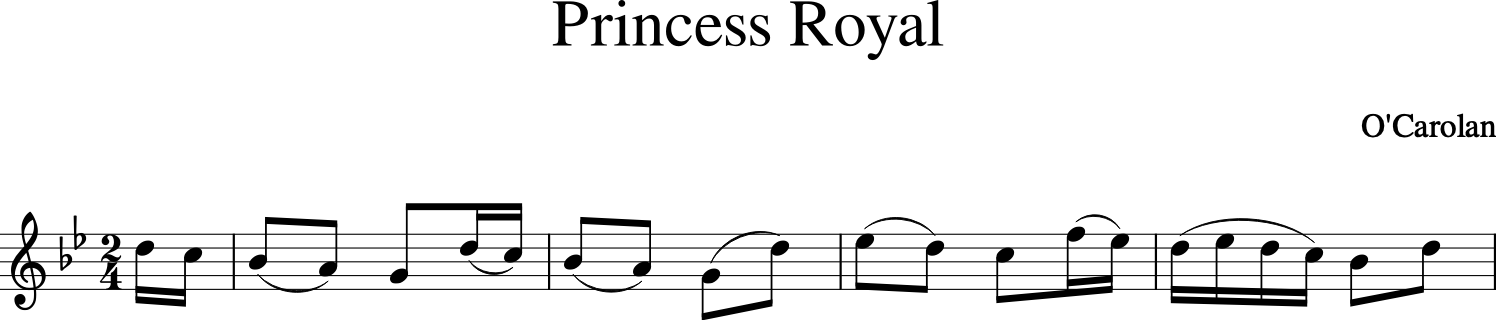

In [54]:
c[0].parse().measures(0,4).show()

Visualising the pitch and duration of notes in the opening:

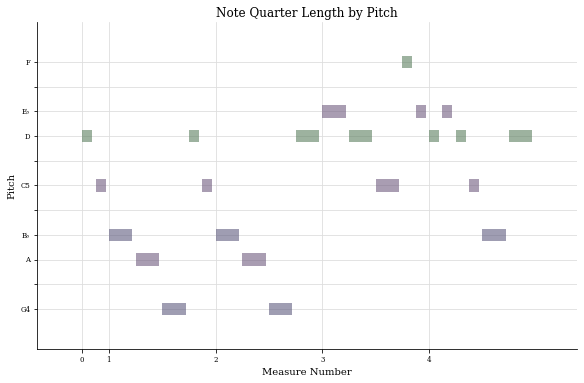

In [55]:
c[0].parse().measures(0,4).plot()

## Converting Midi Files to Audio Files

We can convert a MIDI file to an audio file (eg a `.wav` file) using the [*fluisynth*](https://www.fluidsynth.org/) cross-platfrom command line application.

This application also requires the installation of a [soundfont](https://github.com/FluidSynth/fluidsynth/wiki/SoundFont) such as the [*GeneralUser* soundfont](http://www.schristiancollins.com/generaluser.php ).

In [23]:
#  fluidsynth: https://www.fluidsynth.org/
#!brew install fluidsynth
# Requires a soundfont: https://github.com/FluidSynth/fluidsynth/wiki/SoundFont -> https://www.dropbox.com/s/4x27l49kxcwamp5/GeneralUser_GS_1.471.zip?dl=1
#http://www.schristiancollins.com/generaluser.php 
#%pip install git+https://github.com/nwhitehead/pyfluidsynth.git

The following utility function will handle the conversion for us:

In [17]:
#Based on: https://gist.github.com/devonbryant/1810984
import os
import subprocess

def to_audio(midi_file, sf2="GeneralUser/GeneralUser.sf2",
             out_dir=".", out_type='wav', txt_file=None, append=True):
    """ 
    Convert a single midi file to an audio file.  If a text file is specified,
    the first line of text in the file will be used in the name of the output
    audio file.  For example, with a MIDI file named '01.mid' and a text file
    with 'A    major', the output audio file would be 'A_major_01.wav'.  If
    append is false, the output name will just use the text (e.g. 'A_major.wav')
    
    Args:
        midi_file (str):  the file path for the .mid midi file to convert
        sf2 (str):        the file path for a .sf2 soundfont file
        out_dir (str):    the directory path for where to write the audio out
        out_type (str):   the output audio type (see 'fluidsynth -T help' for options)
        txt_file (str):   optional text file with additional information of how to name 
                          the output file
        append (bool):    whether or not to append the optional text to the original
                          .mid file name or replace it
    """
    fbase = os.path.splitext(os.path.basename(midi_file))[0]
    if not txt_file:
        out_file = out_dir + '/' + fbase + '.' + out_type
    else:
        line = 'out'
        with open(txt_file, 'r') as f:
            line = re.sub(r'\s', '_', f.readline().strip())
            
        if append:
            out_file = out_dir + '/' + line + '_' + fbase + '.' + out_type
        else:
            out_file = out_dir + '/' + line + '.' + out_type

    subprocess.call(['fluidsynth', '-T', out_type, '-F', out_file, '-ni', sf2, midi_file])

Pass the name of the sound file and create a `.wav` file:

In [18]:
to_audio("alto.mid")

We can now embed an audio player to play the wav file:

In [20]:
from IPython.display import Audio

Audio("alto.wav")

### Visualising Audio Files

Haiving got an audio file representation, we can then process it as a sound file. For example, we can look at the waveform: 

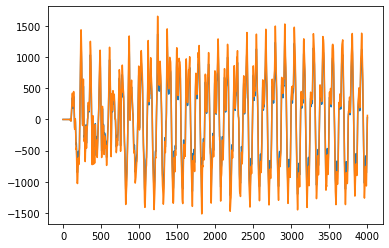

In [22]:
from scipy.io import wavfile
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

samplerate, data = wavfile.read('alto.wav')

times = np.arange(len(data)/float(samplerate))

plt.plot(data[:4000]);

### `abc.js`

[`abc.js`](https://github.com/paulrosen/abcjs) is a simple notation and Javascript rendered for working with music.

We can use a simple IPython cell block magic to allow us to write and render `abc.js` scores (*only works in live notebook? doesn't work in Jupyter Book?*):

In [64]:
#https://github.com/akaihola/jupyter_abc
%%capture
try:
    %load_ext jupyter_abc
except:
    %pip install git+https://github.com/akaihola/jupyter_abc.git

%reload_ext jupyter_abc

In [72]:
%%abc
%%score (R1 R2) (L)
X: 1
T: Blue Bells of Scotland
M: 4/4
L: 1/8
K: C
V:R
G2|c4B2A2|G4A2Bc|z8|z4z2G2|
V:L
z2|z8|z8|E2E2E2D2|C6z2|
V:R
|c4B2A2|G4A2Bc|z8|z8|
V:L
|z8|z8|E2E2F2D2|C6G2|
V:R
z8|c4G2Bc|B2G2A2B2|G4A2B2|
V:L
E2C2E2G2|z8|z8|z8|
V:R
c4B2A2|G4A2Bc|z8|z6|]
V:L
z8|z8|E2E2F2D2|C6|]

<IPython.core.display.Javascript object>

The `music21` package is also capable of parsing `abcjs` notation in a saved file:

In [71]:
abcjs = '''
X: 1
T: Blue Bells of Scotland
M: 4/4
L: 1/8
K: C
V:R
G2|c4B2A2|G4A2Bc|z8|z4z2G2|
V:L
z2|z8|z8|E2E2E2D2|C6z2|
V:R
|c4B2A2|G4A2Bc|z8|z8|
V:L
|z8|z8|E2E2F2D2|C6G2|
V:R
z8|c4G2Bc|B2G2A2B2|G4A2B2|
V:L
E2C2E2G2|z8|z8|z8|
V:R
c4B2A2|G4A2Bc|z8|z6|]
V:L
z8|z8|E2E2F2D2|C6|]
'''

abc_fn = 'demo.abc'
with open(abc_fn, 'w') as outfile:
    outfile.write(abcjs)

Simply use the `music21.converter.parse()` function with the file name to create a `music21` object that we can use in the normal way (viewing the sheet music, creating an embedded audio version, etc.):

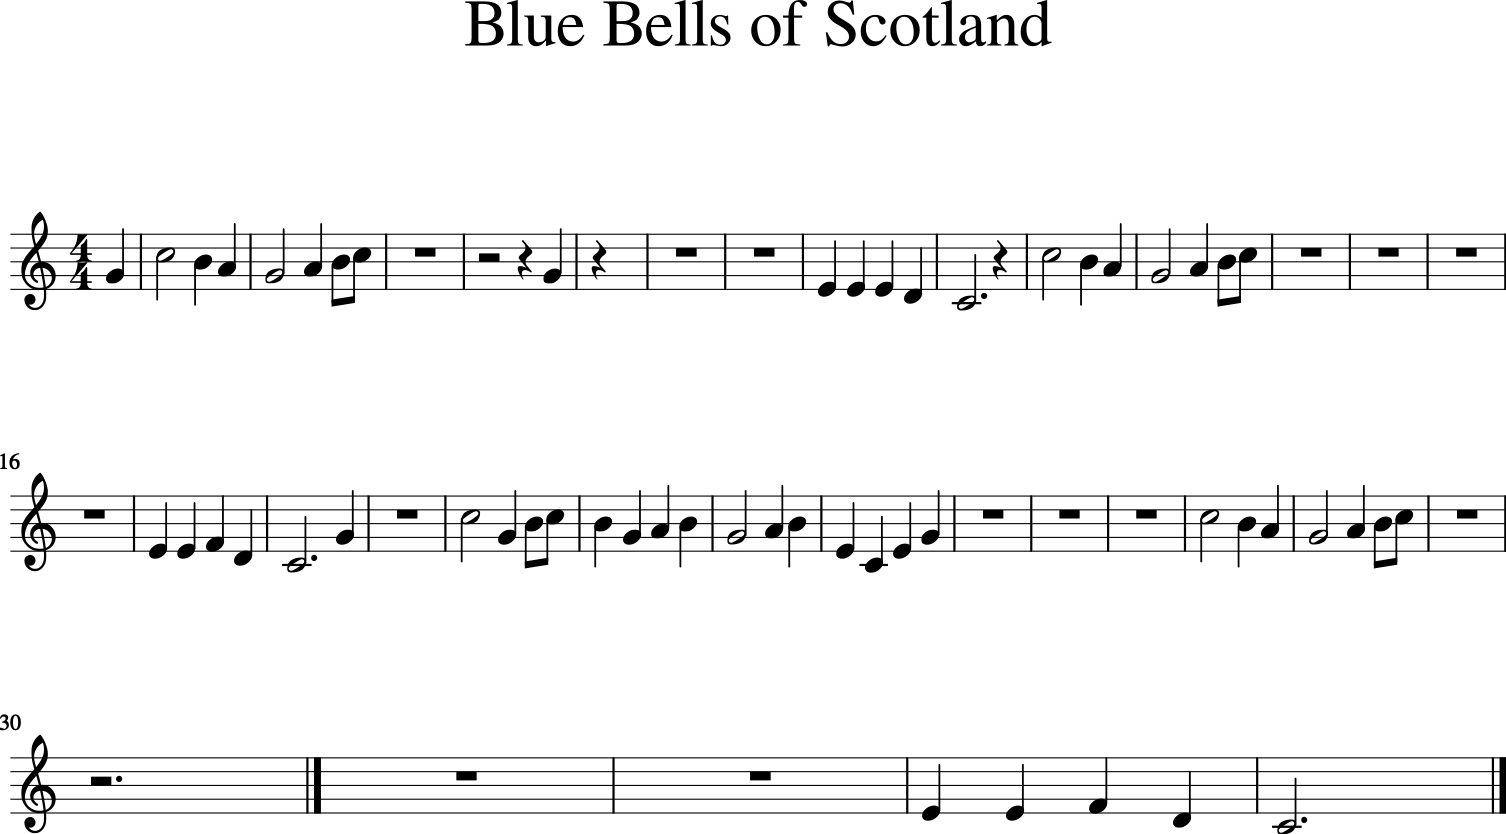

In [76]:
converter.parse(abc_fn).show()